In [454]:
# Michael Cho Cs course 2 project
#This is the finished project.
import pandas as pd
import matplotlib.pyplot as math
import os
import seaborn as sb
import numpy as np
from numpy import asarray
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from scipy import stats
# 1 and 2.
mydata = pd.read_csv("C:/Users/micha/marketing_data.csv")
mydata['Dt_Customer']=pd.to_datetime(mydata['Dt_Customer'])

print(list(mydata.columns.values)
)
salary = mydata[' Income ']
mydata['Income'] = mydata[' Income '].str.replace(',','').str.replace('$','').astype('float') 
#print(salary) this returned an error for now since missing data so its working.


#since in the European union, 2n cycle is a masters degree, and since alone is the same as single, these two statements below cleanse 
# the data to make it more uniform.
mydata.replace({'2n Cycle': 'Master'}, inplace=True)
mydata.replace({'Alone': 'Single'}, inplace=True)

#Since for maritial status, there is no translation for Yolo and absurd without making assumptions that may be incorrect, the best thing to do is
#  to delete any row with yolo or absurd.
mydata =mydata[mydata.Marital_Status != 'YOLO']
mydata =mydata[mydata.Marital_Status != 'Absurd']


#check to make sure that data is cleaned by acessing unique variables.
unique_edu_values = mydata['Education'].unique()
print(unique_edu_values)
unique_marry_values = mydata['Marital_Status'].unique()
print(unique_marry_values)

group_means = mydata.groupby(['Education', 'Marital_Status'])['Income'].transform('mean')
# Fill missing values with the corresponding group means
mydata['Income'].fillna(group_means, inplace=True)
#Then filter for any null values
filtered_data = mydata.dropna()
print(filtered_data)


['ID', 'Year_Birth', 'Education', 'Marital_Status', ' Income ', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Response', 'Complain', 'Country']
['Graduation' 'PhD' 'Master' 'Basic']
['Divorced' 'Single' 'Married' 'Together' 'Widow']
         ID  Year_Birth   Education Marital_Status      Income   Kidhome  \
0      1826        1970  Graduation       Divorced  $84,835.00         0   
1         1        1961  Graduation         Single  $57,091.00         0   
2     10476        1958  Graduation        Married  $67,267.00         0   
3      1386        1967  Graduation       Together  $32,474.00         1   
4      5371        1989  Graduation         Single  $21,474.00         1   
...     ...         ...

C:\Users\micha\AppData\Local\Temp\ipykernel_32740\3929677445.py:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  mydata['Dt_Customer']=pd.to_datetime(mydata['Dt_Customer'])
C:\Users\micha\AppData\Local\Temp\ipykernel_32740\3929677445.py:42: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  mydata['Income'].fillna(group_means, inplace=True)


In [455]:
#3. Create variables to represent the total number of children, age,  and total spending.
child_num = 0
age = 0
spending_num = 0.0
filtered_data['Total_Children'] = filtered_data['Kidhome'] + filtered_data['Teenhome']
current_year = pd.Timestamp.now().year
filtered_data['Age'] = current_year - filtered_data['Year_Birth']
spending_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
filtered_data['Total_Spending'] = filtered_data[spending_columns].sum(axis=1)
purchase_columns = ['NumWebPurchases', 'NumStorePurchases', 'NumCatalogPurchases']
filtered_data['Total_Purchases'] = filtered_data[purchase_columns].sum(axis=1)

C:\Users\micha\AppData\Local\Temp\ipykernel_32740\3569796977.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Total_Children'] = filtered_data['Kidhome'] + filtered_data['Teenhome']
C:\Users\micha\AppData\Local\Temp\ipykernel_32740\3569796977.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Age'] = current_year - filtered_data['Year_Birth']
C:\Users\micha\AppData\Local\Temp\ipykernel_32740\3569796977.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

In [456]:
#3 drop unecessary values
filtered_data= filtered_data.drop(["ID","Year_Birth","Kidhome","Teenhome","Dt_Customer"], axis=1)    

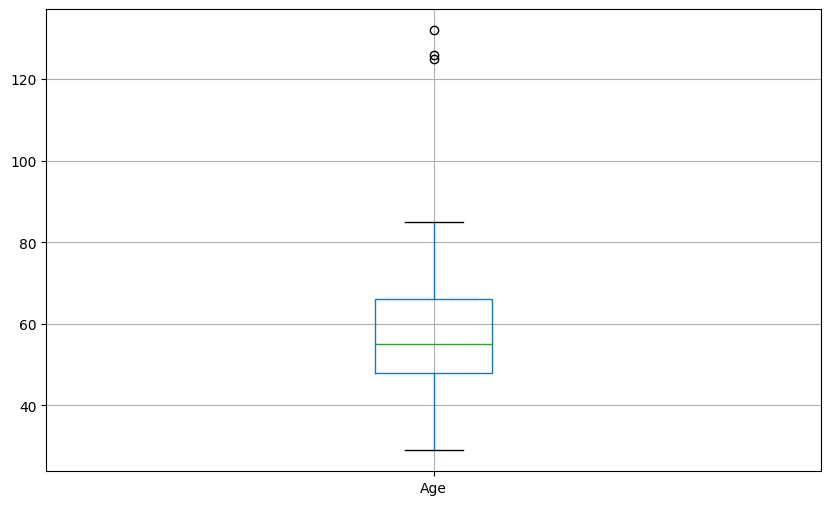

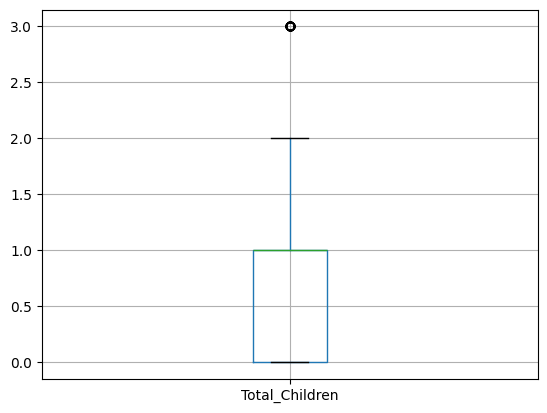

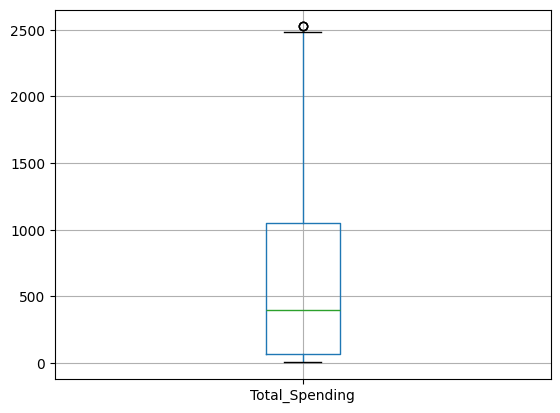

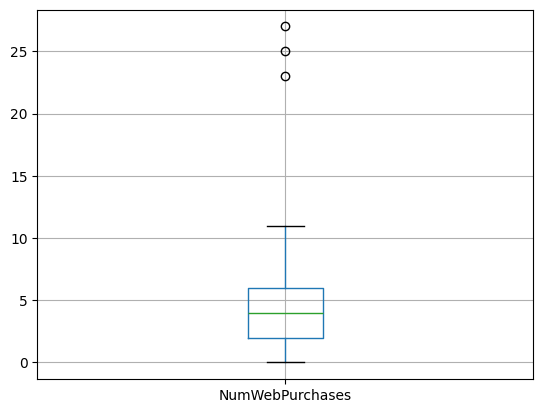

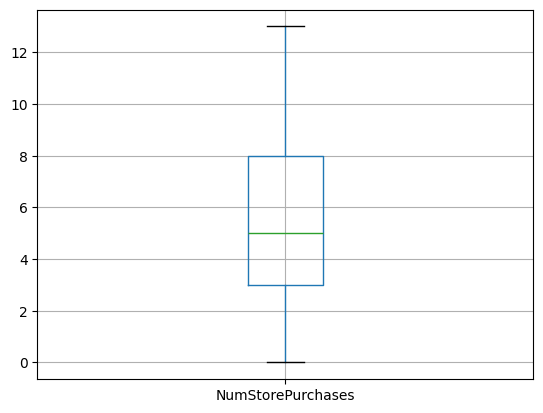

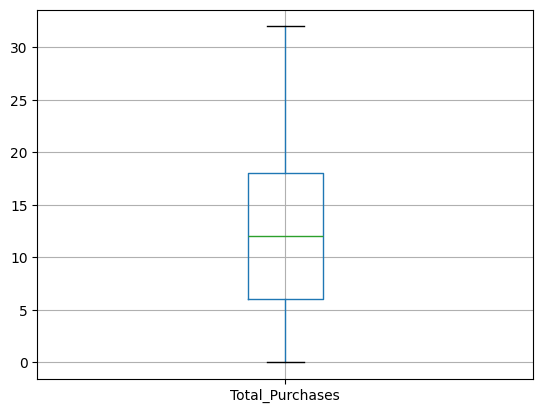

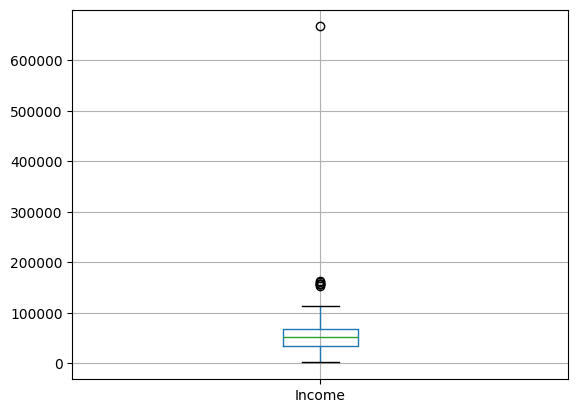

In [457]:
#4. Make box plots and histoograms for age, total children, total spending, and total purchases, also check income removing outliers as needed. 
filtered_data.boxplot(['Age'])
math.show(block = False)


filtered_data.boxplot(['Total_Children'])
math.show(block = False)

filtered_data.boxplot(['Total_Spending'])
math.show(block = False)

filtered_data.boxplot(['NumWebPurchases'])
math.show(block = False)
filtered_data.boxplot(['NumStorePurchases'])
math.show(block = False)

filtered_data.boxplot(['Total_Purchases'])
math.show(block = False)
filtered_data.boxplot(['Income'])
math.show(block = False)


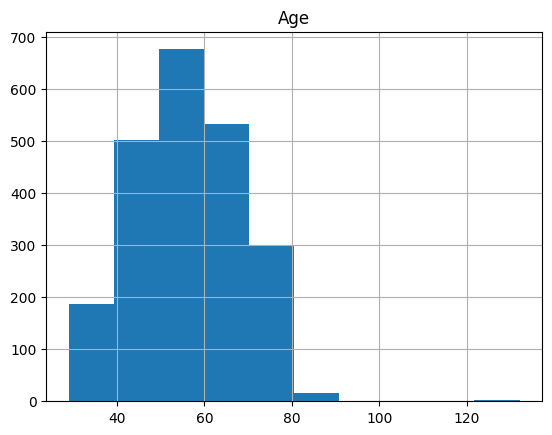

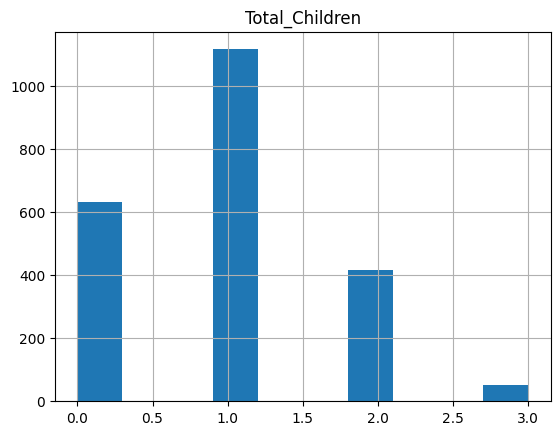

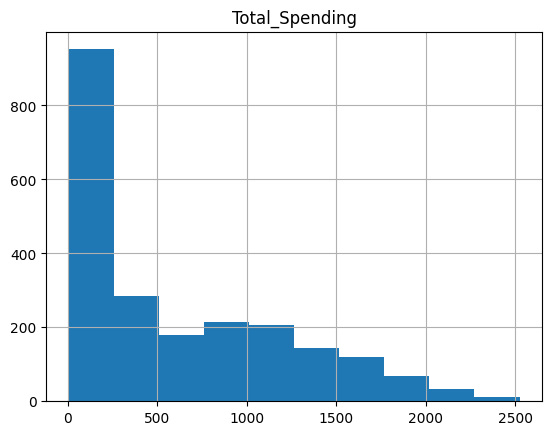

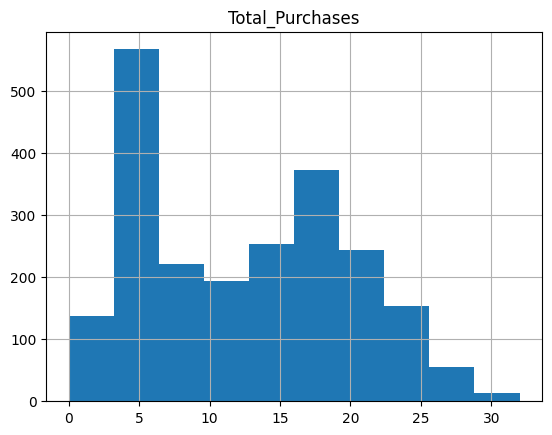

In [458]:
#historgrams
filtered_data.hist('Age')
math.show (block = False)
filtered_data.hist('Total_Children')
math.show (block = False)

filtered_data.hist('Total_Spending')
math.show(block = False)
filtered_data.hist('Total_Purchases')
math.show(block = False)

In [459]:
#4 remove outliers
yq = 100
filtered_data = filtered_data[filtered_data['Age'] <= yq]

tcq = 2.0
filtered_data = filtered_data[filtered_data['Total_Children'] <= tcq]
iq = 125000
filtered_data = filtered_data[filtered_data['Income'] <iq]
webq = 15
filtered_data = filtered_data[filtered_data['NumWebPurchases'] <webq]

wq = 2500
filtered_data = filtered_data[filtered_data['Total_Spending'] < wq]

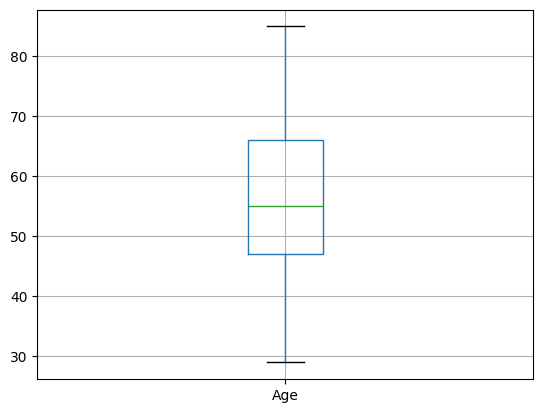

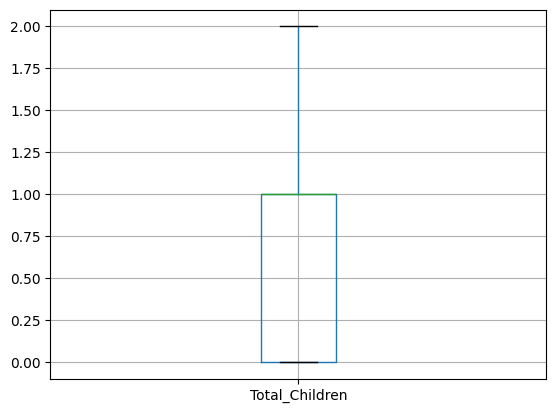

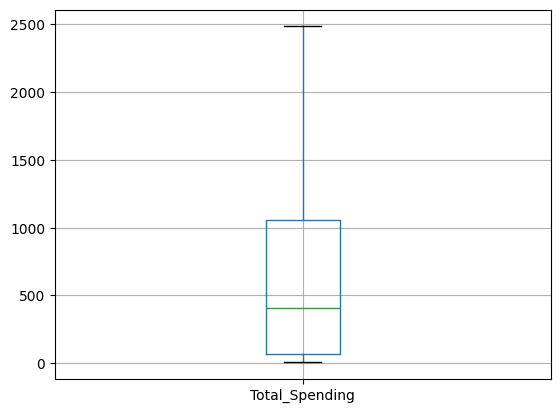

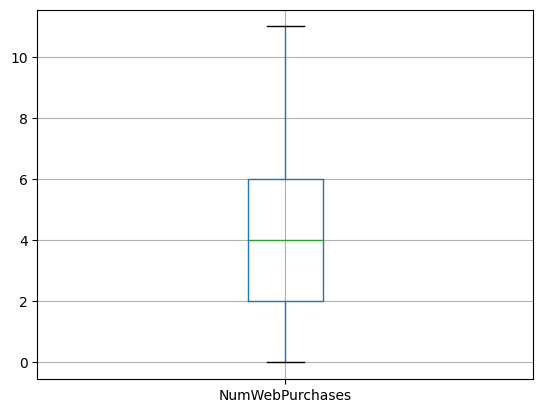

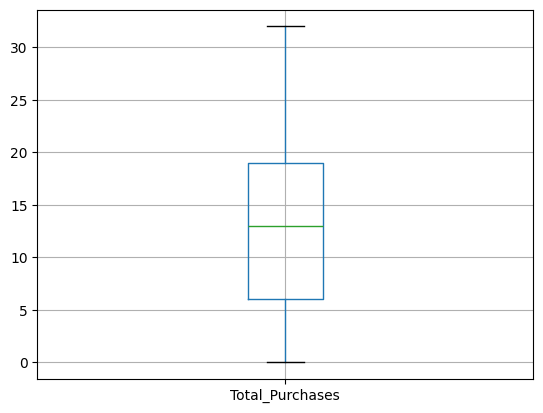

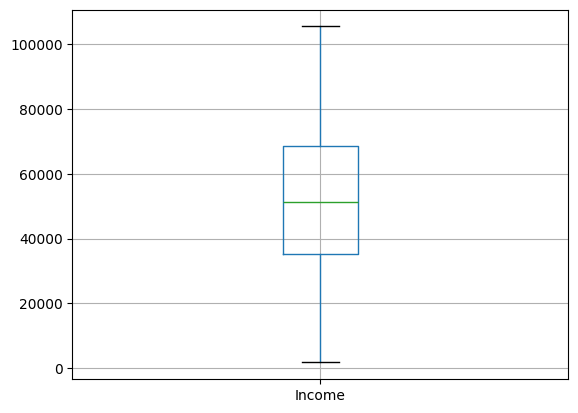

In [460]:
#make new box plots to check to see if outliers  are gone

filtered_data.boxplot(['Age'])
math.show(block = False)

filtered_data.boxplot(['Total_Children'])
math.show(block = False)

filtered_data.boxplot(['Total_Spending'])
math.show(block = False)
filtered_data.boxplot(['NumWebPurchases'])
math.show(block = False)

filtered_data.boxplot(['Total_Purchases'])
math.show(block = False)
filtered_data.boxplot(['Income'])
math.show(block = False)

In [461]:
#5 ordinal encoder. 
print(filtered_data["Education"].value_counts(), "\n")

education_order = ['Basic', 'Graduation', 'Master','PhD']
encoder = OrdinalEncoder(categories=[education_order])

filtered_data['Education_encoded'] = encoder.fit_transform(filtered_data[['Education']])

Education
Graduation    1087
Master         548
PhD            456
Basic           54
Name: count, dtype: int64 



In [462]:
#5 One hot encoder
filtered_data= pd.get_dummies(filtered_data, columns=[ "Marital_Status"])
filtered_data.head(3)

,Education,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,...,Total_Children,Age,Total_Spending,Total_Purchases,Education_encoded,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
0,Graduation,"$84,835.00",0,189,104,379,111,189,218,1,...,0,55,1190,14,1.0,True,False,False,False,False
1,Graduation,"$57,091.00",0,464,5,64,7,0,37,1,...,0,64,577,17,1.0,False,False,True,False,False
2,Graduation,"$67,267.00",0,134,11,59,15,2,30,1,...,1,67,251,10,1.0,False,True,False,False,False


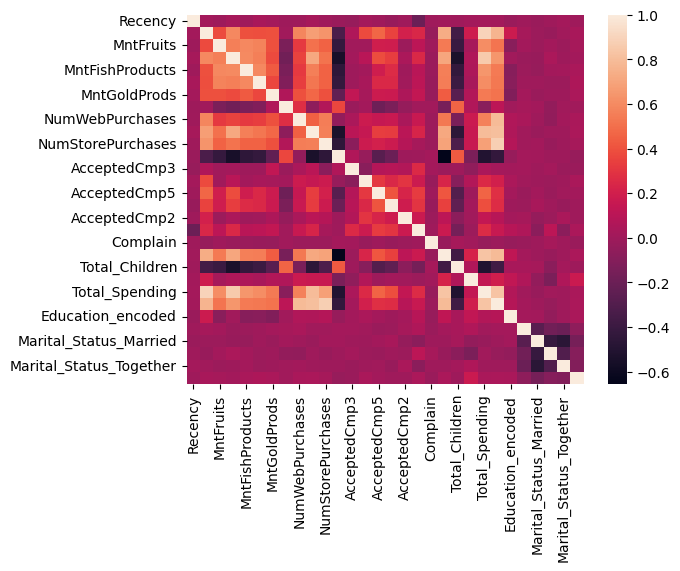

In [463]:
#6 heatmaps
dataplot = sb.heatmap(filtered_data.corr(numeric_only=True))
math.show(block = False)


In [464]:
#7 probablity testing. 
#probablity 1 
filtered_data['Age_Group'] = pd.cut(filtered_data['Age'], bins=[-float('inf'), 60, float('inf')], labels=['<=60', '>60'])


mean_purchases = filtered_data.groupby('Age_Group')['NumStorePurchases'].mean()

print(mean_purchases)
group1 = filtered_data[filtered_data['Age_Group'] == '<=60']['NumStorePurchases']
group2 = filtered_data[filtered_data['Age_Group'] == '>60']['NumStorePurchases']



# Perform a one-tailed t-test
t_stat, p_value = stats.ttest_ind(group2, group1, alternative='greater')

print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')

# Checking if the result is significant at alpha = 0.05
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis and conclude that Mean of 'NumStorePurchases' for age > 60 is significantly greater than for age <= 60.")
else:
    print("Fail to reject the null hypothesis and conclude that Mean of 'NumStorePurchases' for age > 60 is not significantly greater than for age <= 60.")

Age_Group
<=60    5.521056
>60     6.534946
Name: NumStorePurchases, dtype: float64
T-statistic: 6.947137989526335
P-value: 2.463056435378992e-12
Reject the null hypothesis and conclude that Mean of 'NumStorePurchases' for age > 60 is significantly greater than for age <= 60.


C:\Users\micha\AppData\Local\Temp\ipykernel_32740\3686012124.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_purchases = filtered_data.groupby('Age_Group')['NumStorePurchases'].mean()


SInce the mean of number of store purchases is greater for the eldery than those that aren't eldery, we can safely assume that the hypothesis is correct and that older people do tend to lean towards in store purchases. 

In [465]:
#Hypothesis 2
#For better splitting
filtered_data["Has_Children"] = np.where(filtered_data.Total_Children> 0, 1, 0)

mean_purchases = filtered_data.groupby('Has_Children')['NumWebPurchases'].mean()
print(mean_purchases)
group1 = filtered_data[filtered_data['Has_Children'] == 0]['NumWebPurchases']
group2 = filtered_data[filtered_data['Has_Children'] == 1]['NumWebPurchases']

# Perform a one-tailed t-test
t_stat, p_value = stats.ttest_ind(group2, group1, alternative='greater')

print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')

# Checking if the result is significant at alpha = 0.05
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis and conclude that Mean of 'NumWebPurchases' for Has_Children=1 is significantly greater than for Has_Children=1.")
else:
    print("Fail to reject the null hypothesis and conclude that Mean of 'NumWebPurchases' for Has_Children=1 is not significantly greater than for Has_Children=0.")

Has_Children
0    4.401929
1    3.975049
Name: NumWebPurchases, dtype: float64
T-statistic: -3.4221387069522486
P-value: 0.9996835151152728
Fail to reject the null hypothesis and conclude that Mean of 'NumWebPurchases' for Has_Children=1 is not significantly greater than for Has_Children=0.


Since the mean of number of web purchases for people that have children isn't greater than the web purchaes for people that do not have children, we can assume that the hypothesis is incorrect and that customers with children don't tend to use online shopping more than customers without children

In [466]:
#hypothesis 3
filtered_data['NumOtherPurchases']=filtered_data['Total_Purchases']-filtered_data['NumStorePurchases']

group1 = filtered_data['NumOtherPurchases']
group2 = filtered_data['NumStorePurchases']

# Perform a one-tailed t-test
t_stat, p_value = stats.ttest_ind(group2, group1, alternative='less')

print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')

# Checking if the result is significant at alpha = 0.05
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis and conclude that Mean of 'NumStorePurchases' is significantly lesser than 'NumOtherPurchases'.")
else:
    print("Fail to reject the null hypothesis and conclude that Mean of 'NumStorePurchases' is not significantly lesser than 'NumOtherPurchases'.")

T-statistic: -7.417636243790535
P-value: 7.146648698473213e-14
Reject the null hypothesis and conclude that Mean of 'NumStorePurchases' is significantly lesser than 'NumOtherPurchases'.


Since the mean of the number of store purchases is less than the mean of other purchases, ie alternative channels, we can safely assume that the hypothesis is true and that the sales at stores are at risk of being cannibalized by alternative channels. 

In [467]:
#hypothesis 4
# Split the data into two groups: 'US' and 'Non-US'
us_group = filtered_data[filtered_data['Country'] == 'US']
non_us_group = filtered_data[filtered_data['Country'] != 'US']

# Calculate the mean of TotalPurchases for the two groups
us_mean = us_group['Total_Purchases'].mean()
non_us_mean = non_us_group['Total_Purchases'].mean()

print("Mean of TotalPurchases for 'Country' == 'US':", us_mean)
print("Mean of TotalPurchases for 'Country' != 'US':", non_us_mean)
group1 = filtered_data[filtered_data['Country'] != 'US']['Total_Purchases']
group2 = filtered_data[filtered_data['Country'] == 'US']['Total_Purchases']

# Perform a one-tailed t-test
t_stat, p_value = stats.ttest_ind(group2, group1, alternative='greater')

print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')

# Checking if the result is significant at alpha = 0.05
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis and conclude that  Mean of 'Total_Purchases' in US is significantly greater than Non-US.")
else:
    print("Fail to reject the null hypothesis and conclude that Mean of 'Total_Purchases' in US is not significantly greater than Non-US.")

Mean of TotalPurchases for 'Country' == 'US': 13.514563106796116
Mean of TotalPurchases for 'Country' != 'US': 12.606758080313417
T-statistic: 1.2526245136274141
P-value: 0.10523953094719632
Fail to reject the null hypothesis and conclude that Mean of 'Total_Purchases' in US is not significantly greater than Non-US.


Since we fail to reject the null hypothesis that the mean of totoal purchases in us is not significantly greater than non-us we can safely reject the intial hypothesis and conclude that the US does not significantly outperform the world in terms of total purchase volume.

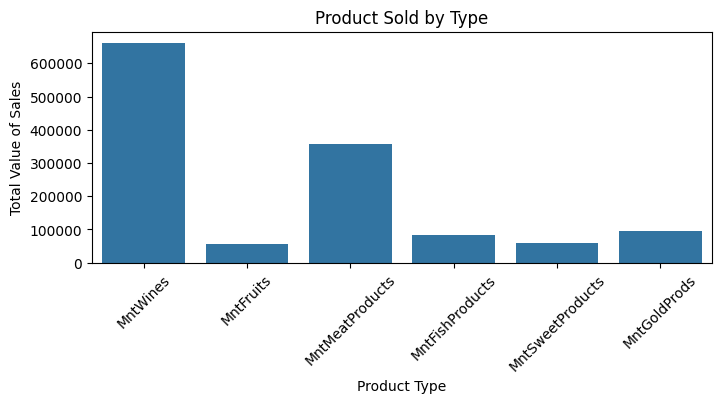

In [468]:
#8
totals = {
    'Product Type': ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'],
    'Total Spent': [
        filtered_data['MntWines'].sum(),
        filtered_data['MntFruits'].sum(),
        filtered_data['MntMeatProducts'].sum(),
        filtered_data['MntFishProducts'].sum(),
        filtered_data['MntSweetProducts'].sum(),
        filtered_data['MntGoldProds'].sum(),
    ]
}

df_totals = pd.DataFrame(totals)

# Create the bar chart
math.figure(figsize=(8, 3))
sb.barplot(x='Product Type', y='Total Spent', data=df_totals)
math.title('Product Sold by Type')

math.ylabel('Total Value of Sales')
math.xticks(rotation=45)  # Rotates labels to avoid overlap
math.show()

The top selling products are wine and meat products while the lowest revene products are fruits and sweets

The correlation between Age and Response is: -0.013239892542537036


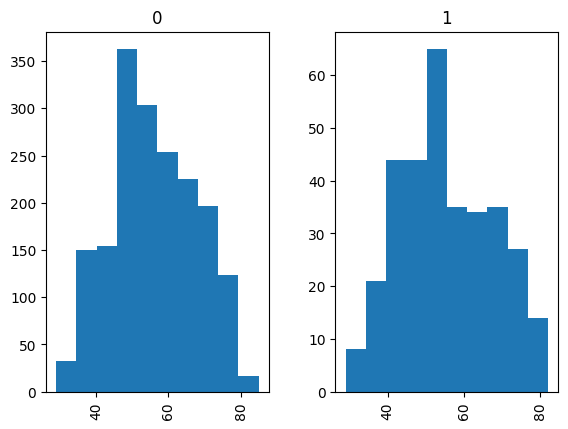

In [469]:
#B
correlation = filtered_data['Age'].corr(filtered_data['Response'])

print(f"The correlation between Age and Response is: {correlation}")
filtered_data.hist('Age', 'Response')
math.show (block = False)

SInce the absolute value of the correlation value is less than 1, we can safely assume that there is no correlation between age and response. The two histogram graphs supports a lack of correlation because the shape of each of the two graphs are both entirely different. 

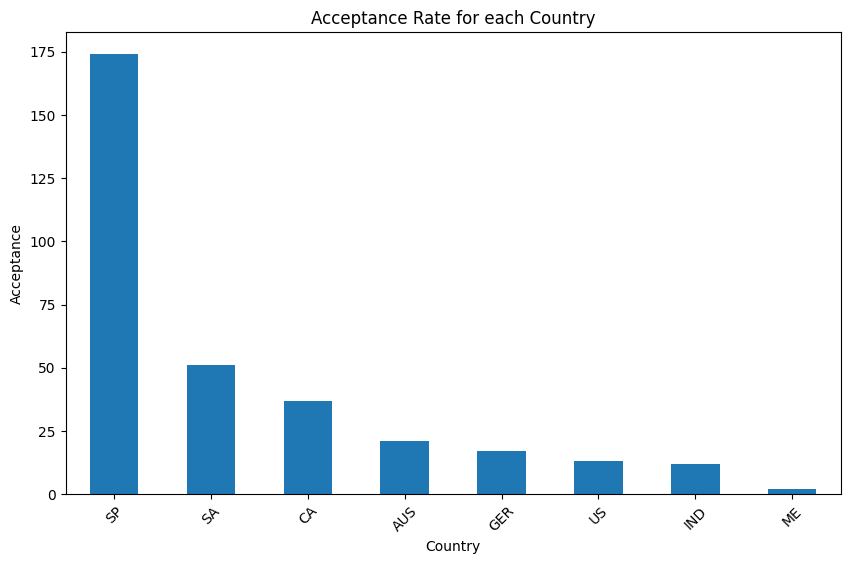

In [470]:
#C
response_data = filtered_data[filtered_data['Response'] == 1]
# Counting the number of customers in each country who had given acceptance
country_counts = response_data['Country'].value_counts()
# Plot 
math.figure(figsize=(10, 6))
country_counts.plot(kind='bar')
math.xlabel('Country')
math.ylabel('Acceptance')
math.title('Acceptance Rate for each Country')
math.xticks(rotation=45)
math.show()

The bar graph suggests that SP, which is Spain, has the highest amount of customers that approve the previous goverment. 

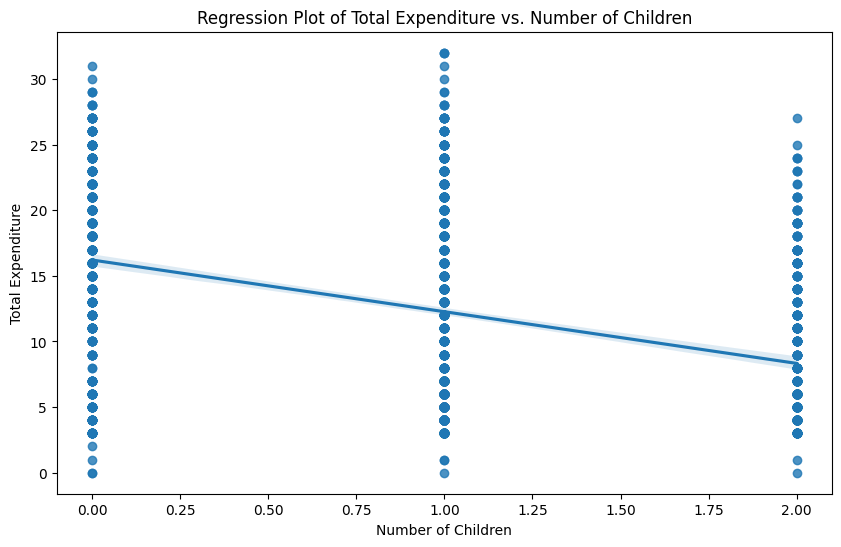

In [471]:
#d
math.figure(figsize=(10, 6))
sb.regplot(x='Total_Children', y='Total_Purchases', data=filtered_data)
math.xlabel('Number of Children')
math.ylabel('Total Expenditure')
math.title('Regression Plot of Total Expenditure vs. Number of Children')
math.show()

The graph suggests that as the number of children increases the value of total purchases decreases

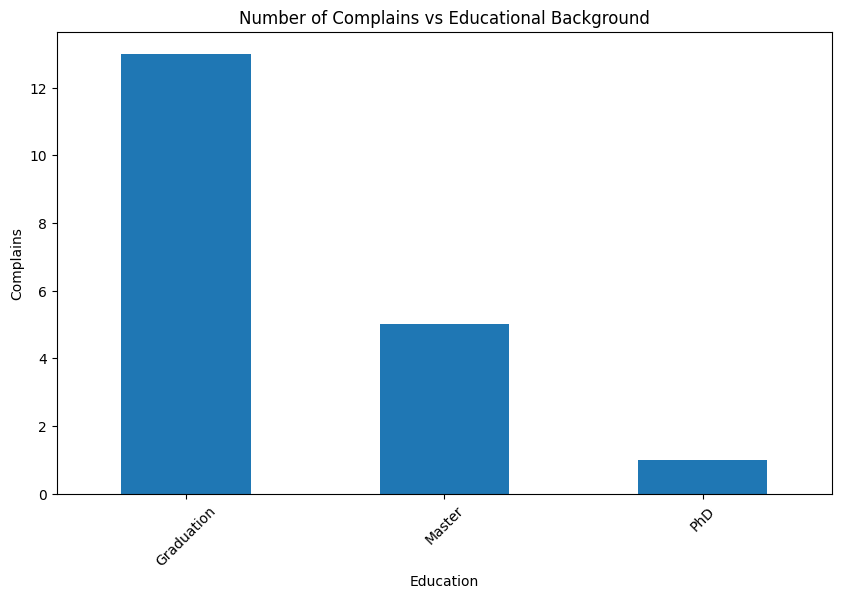

In [472]:
#e
complain_data = filtered_data[filtered_data['Complain'] == 1]
education_counts = complain_data['Education'].value_counts()
# Plot 
math.figure(figsize=(10, 6))
education_counts.plot(kind='bar')
math.xlabel('Education')
math.ylabel('Complains')
math.title('Number of Complains vs Educational Background')
math.xticks(rotation=45)
math.show()

The graph suggests that college graduates had the most complaints. 